In [1]:
#from bsread import source, Source
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from datetime import datetime
import epics
from epics import caput, PV, caget
import h5py
import time
import os
from scipy import optimize
from scipy.signal import find_peaks
import sys
from bstrd import BS, bsstream

In [2]:
#ch_xpos = 'SARFE10-PBPS053:XPOS'
#ch_ypos = 'SARFE10-PBPS053:YPOS'
ch_xpos = 'SAROP11-PBPS110:XPOS'
ch_ypos = 'SAROP11-PBPS110:YPOS'
bs_xpos = BS(ch_xpos)
bs_ypos = BS(ch_ypos)

add channel SAROP11-PBPS110:XPOS
dropping data that is missing new channel: SAROP11-PBPS110:XPOS


add channel SAROP11-PBPS110:YPOS
dropping data that is missing new channel: SAROP11-PBPS110:YPOS
dropping data that is missing new channel: SAROP11-PBPS110:YPOS
dropping data that is missing new channel: SAROP11-PBPS110:YPOS
dropping data that is missing new channel: SAROP11-PBPS110:YPOS
dropping data that is missing new channel: SAROP11-PBPS110:YPOS
dropping data that is missing new channel: SAROP11-PBPS110:YPOS
dropping data that is missing new channel: SAROP11-PBPS110:YPOS
dropping data that is missing new channel: SAROP11-PBPS110:YPOS
dropping data that is missing new channel: SAROP11-PBPS110:YPOS
dropping data that is missing new channel: SAROP11-PBPS110:YPOS
dropping data that is missing new channel: SAROP11-PBPS110:YPOS


In [101]:
nshots = 1000
dat_xpos = np.empty(nshots)
dat_ypos = np.empty(nshots)
#dat_wI = np.empty(nshots)

for i in range(nshots):
    dat_xpos[i] = bs_xpos.get()
    dat_ypos[i] = bs_ypos.get()
    #dat_wI[i] = bs_wI.get()
    next(bsstream) # this gets the next set of data

<IPython.core.display.Javascript object>


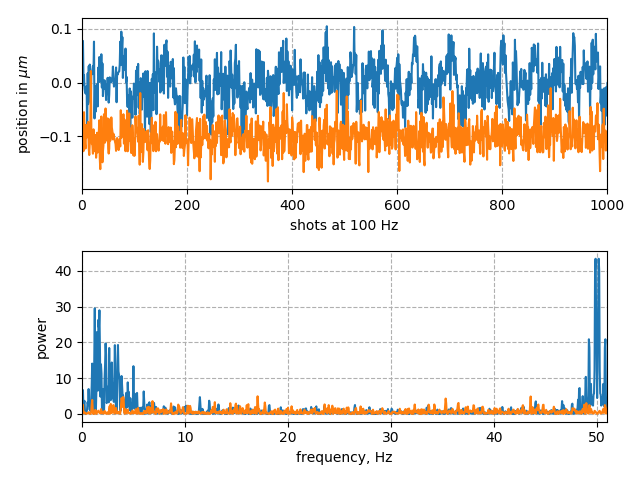

In [102]:
%matplotlib nbagg
x=np.arange(0,100,0.05)
valsdiode = np.hstack((dat_xpos-np.mean(dat_xpos), np.zeros_like(dat_xpos)))
vals2diode = np.hstack((dat_ypos-np.mean(dat_ypos), np.zeros_like(dat_ypos)))
powerx = np.abs(np.fft.fft(valsdiode))**2
powery = np.abs(np.fft.fft(vals2diode))**2

fig, axs = plt.subplots(2, 1)
axs[0].plot(valsdiode)
axs[0].plot(vals2diode-0.1)
axs[0].set_xlim(0,1000)
axs[0].set_xlabel('shots at 100 Hz')
axs[0].set_ylabel('position in $\mu m$')
axs[0].grid(True, linestyle='--')

axs[1].plot(x, powerx)
axs[1].plot(x, powery)
axs[1].set_xlabel('frequency, Hz')
axs[1].set_ylabel('power')
axs[1].set_xlim(0,51)
axs[1].grid(True, linestyle='--')
fig.tight_layout()
plt.show()